# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset["CustomerId"].nunique()        #All customers are unique

10000

In [5]:
dataset.shape

(10000, 14)

### Missing Values

In [6]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
dataset.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace = True)

In [9]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
dataset["Geography"].unique()  #Nominal

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
dataset["Gender"].unique()     #Nominal

array(['Female', 'Male'], dtype=object)

### One Hot Encoding

In [12]:
dataset = pd.get_dummies(dataset,columns=["Geography","Gender"],drop_first=True,dtype=int)

In [13]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
dataset.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int32
Geography_Spain        int32
Gender_Male            int32
dtype: object

## Split the Independent and Dependent variables

In [15]:
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


In [16]:
#Independent variables
X = dataset.drop("Exited",axis = 1)

In [17]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [18]:
type(X)

pandas.core.frame.DataFrame

In [19]:
X.shape

(10000, 11)

In [20]:
y = dataset["Exited"]

In [21]:
y.shape

(10000,)

In [22]:
X.shape

(10000, 11)

### Split the data into train and test set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#20% --Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [25]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [26]:
X_train.shape

(8000, 11)

In [27]:
X_test.shape

(2000, 11)

### Balancing Dataset

In [28]:
y_train.value_counts()

Exited
0    6356
1    1644
Name: count, dtype: int64

In [29]:
y_train.value_counts() / len(y_train)

Exited
0    0.7945
1    0.2055
Name: count, dtype: float64

In [30]:
#y_test.value_counts()

In [31]:
#y_test.value_counts() / len(y_test)

In [32]:
smote =SMOTE(sampling_strategy = 'auto',random_state=0)

X_train,y_train =smote.fit_resample(X_train,y_train)
X_test,y_test =smote.fit_resample(X_test,y_test)

print('Resampled class distribution',Counter(y_train))
print('Resampled class distribution',Counter(y_test))

Resampled class distribution Counter({0: 6356, 1: 6356})
Resampled class distribution Counter({0: 1607, 1: 1607})


In [33]:
y_train.value_counts()

Exited
0    6356
1    6356
Name: count, dtype: int64

In [34]:
y_train.value_counts() / len(y_train)

Exited
0    0.5
1    0.5
Name: count, dtype: float64

In [35]:
y_test.value_counts()

Exited
0    1607
1    1607
Name: count, dtype: int64

In [36]:
y_train.value_counts() / len(y_train)

Exited
0    0.5
1    0.5
Name: count, dtype: float64

### Scaling or Standardization or Normalization

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()       #Creatin the object

In [39]:
#fit -- To apply the formula
#transform -- 
X_train = sc.fit_transform(X_train)

In [40]:
X_test = sc.transform(X_test)

In [41]:
X_train

array([[ 0.39870096, -0.8879525 ,  0.44066526, ..., -0.56935636,
        -0.46387519,  1.18526072],
       [-0.19612828,  0.11174214, -0.29596921, ...,  1.75636924,
        -0.46387519,  1.18526072],
       [-1.00024929, -1.68770821, -0.66428644, ..., -0.56935636,
         2.15575228,  1.18526072],
       ...,
       [-0.89009573, -0.68801357, -0.66428644, ..., -0.56935636,
        -0.46387519, -0.84369623],
       [-1.81538565, -0.08819679, -0.29596921, ...,  1.75636924,
        -0.46387519, -0.84369623],
       [ 0.8172845 , -1.08789142,  0.44066526, ..., -0.56935636,
        -0.46387519, -0.84369623]])

In [42]:
X_test

array([[-0.59268111, -0.8879525 , -0.66428644, ...,  1.75636924,
        -0.46387519,  1.18526072],
       [-0.29526649,  0.21171161, -1.40092091, ..., -0.56935636,
        -0.46387519,  1.18526072],
       [-0.53760432,  0.31168107, -0.29596921, ..., -0.56935636,
         2.15575228, -0.84369623],
       ...,
       [-0.55963504, -0.8879525 , -0.29596921, ..., -0.56935636,
        -0.46387519, -0.84369623],
       [ 1.01556091, -0.28813571, -0.66428644, ..., -0.56935636,
        -0.46387519, -0.84369623],
       [-0.25120506, -1.08789142,  0.07234803, ..., -0.56935636,
        -0.46387519, -0.84369623]])

In [43]:
y_train.value_counts()

Exited
0    6356
1    6356
Name: count, dtype: int64

In [44]:
y_train.value_counts() / len(y_train)

Exited
0    0.5
1    0.5
Name: count, dtype: float64

### Build the Neural network model

##### Build the Architechture

##### Import the required libraries

In [45]:
from tensorflow.keras import Sequential  #init the NN model -- create the instance of the NN model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense #hidden layer and output

##### Init the NN model

In [46]:
nn_model = Sequential()

##### Add input Layer

In [47]:
X_train.shape

(12712, 11)

In [48]:
X_train.shape[1]

11

In [49]:
# init a input layer -- shape -- no of neutons
inp_layer =  Input(shape= (X_train.shape[1],))

In [50]:
nn_model.add(inp_layer)

##### Add Hidden Layer

In [51]:
# units -- no of neurons in the particular layer
# kernel_initializer -- strategy for init the weights kernel -weights
#bias_initializer 
#activation -- activation function we want to use in the current layer
hidden_layer = Dense(units = 10, 
                     kernel_initializer= 'random_uniform',
                     bias_initializer='random_uniform',
                     activation = 'relu')

In [52]:
nn_model.add(hidden_layer)

#### Add hidden layer 2

In [53]:
hidden_layer_2 = Dense(units = 15, 
                     kernel_initializer= 'random_uniform',
                     bias_initializer='random_uniform',
                     activation = 'relu')

In [54]:
nn_model.add(hidden_layer_2)

##### Add Output Layer

In [55]:
output_layer = Dense(units = 1, 
                     kernel_initializer= 'random_uniform',
                     bias_initializer='random_uniform',
                     activation = 'sigmoid')

In [56]:
nn_model.add(output_layer)

##### Compile the model

In [57]:
#mention various strategies to be followed while training process
#Loss -- error calculating strategy
#optimizer -- weight updation strategy
#metrics -- model performance calculating strategy
nn_model.compile(loss = 'binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#chg optimizer 

In [58]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
from tensorflow.keras.utils import plot_model

In [60]:
#!pip install pydot
#!pip install graphviz

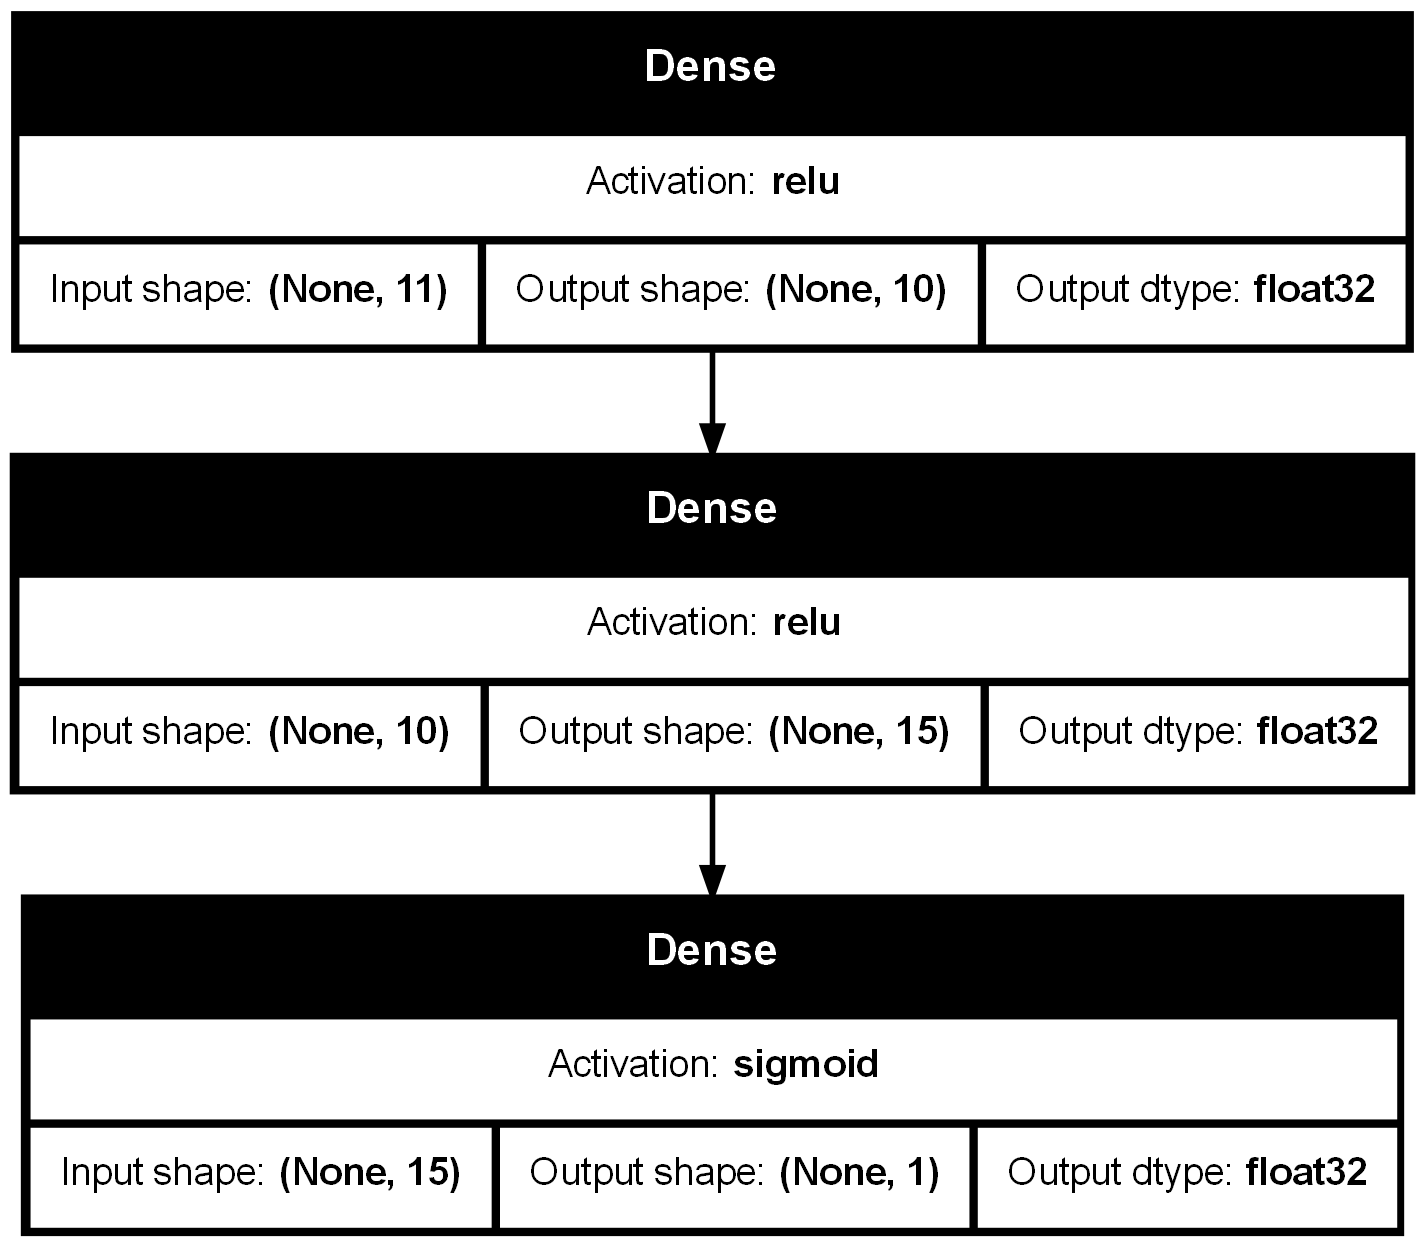

In [61]:
plot_model(nn_model, show_shapes= True, show_dtype= True, show_layer_activations=True)

###### Train the Model

In [62]:
X_train.shape

(12712, 11)

In [63]:
8000/32

250.0

In [64]:
train_logs = nn_model.fit(X_train,y_train, batch_size=32 , epochs=10)

Epoch 1/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4940 - loss: 0.6935
Epoch 2/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5069 - loss: 0.6930
Epoch 3/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5081 - loss: 0.6931
Epoch 4/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5103 - loss: 0.6930
Epoch 5/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5158 - loss: 0.6929
Epoch 6/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5525 - loss: 0.6928
Epoch 7/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5850 - loss: 0.6927
Epoch 8/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5332 - loss: 0.6924
Epoch 9/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6525 - loss: 0.6920
Epoch 10/10
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7025 - loss: 0.6912


In [65]:
train_logs

In [66]:
train_logs.history

{'accuracy': [0.5,
  0.5,
  0.5084172487258911,
  0.5063719153404236,
  0.5114065408706665,
  0.566629946231842,
  0.5906230211257935,
  0.5769351720809937,
  0.6206733584403992,
  0.6913939714431763],
 'loss': [0.6932352185249329,
  0.6931111812591553,
  0.6930659413337708,
  0.6929993033409119,
  0.6929264068603516,
  0.6928111910820007,
  0.6926418542861938,
  0.6923530697822571,
  0.6918566823005676,
  0.6909261345863342]}

In [67]:
loss = train_logs.history['loss']

In [68]:
loss

[0.6932352185249329,
 0.6931111812591553,
 0.6930659413337708,
 0.6929993033409119,
 0.6929264068603516,
 0.6928111910820007,
 0.6926418542861938,
 0.6923530697822571,
 0.6918566823005676,
 0.6909261345863342]

In [69]:
epochs = list(range(1, len(loss)+1))

In [70]:
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

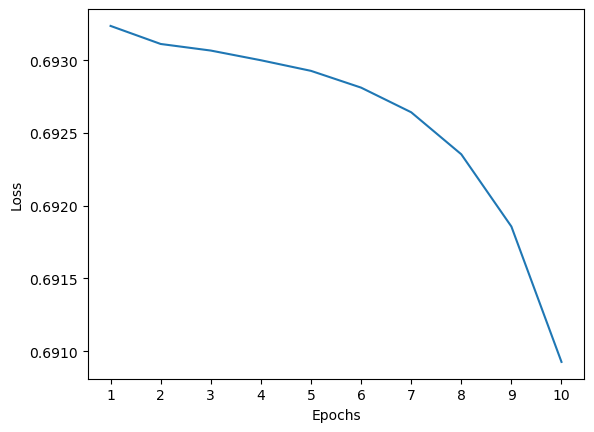

In [71]:
plt.plot(epochs, loss)
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.show()

In [72]:
acccuracy = train_logs.history['accuracy']

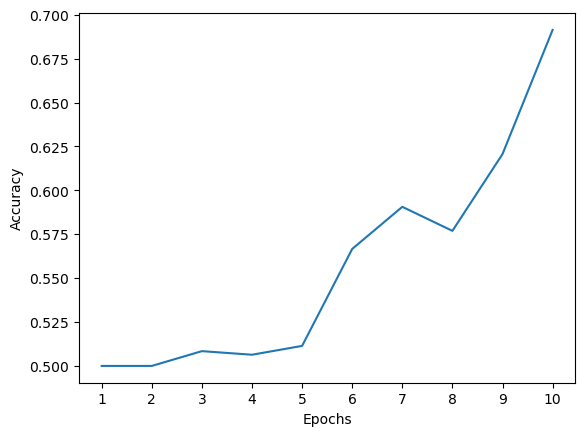

In [73]:
plt.plot(epochs, acccuracy)
plt.xticks(epochs)
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.show()

###### Evaluate the Model

In [74]:
X_test.shape

(3214, 11)

In [75]:
y_pred = nn_model.predict(X_test)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [76]:
y_pred

array([[0.5018977 ],
       [0.49709716],
       [0.49962538],
       ...,
       [0.499869  ],
       [0.50303423],
       [0.50220823]], dtype=float32)

In [77]:
y_pred > 0.5

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [78]:
y_pred = y_pred > 0.5

In [79]:
y_pred = y_pred.astype('int')

In [80]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [81]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
3209    1
3210    1
3211    1
3212    1
3213    1
Name: Exited, Length: 3214, dtype: int64

In [82]:
from sklearn.metrics import accuracy_score, classification_report

In [83]:
accuracy_score(y_test, y_pred)

0.7489110143123833

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.63      0.71      1607
           1       0.70      0.87      0.78      1607

    accuracy                           0.75      3214
   macro avg       0.76      0.75      0.75      3214
weighted avg       0.76      0.75      0.75      3214



###### Save the model

In [85]:
nn_model.save('bank_churn.h5')

In [86]:
import joblib

In [87]:
joblib.dump(sc,'bank_scaler.pkl')

['bank_scaler.pkl']

In [88]:
#X.iloc[105,:]

In [89]:
#list(X.iloc[105,:])